<a href="https://colab.research.google.com/github/Shubham999-code/Hotel-Booking-Analysis/blob/main/Shubham_Kodape_EDA_Hotel_Booking_Analysis_Capstone_Project_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**
# **This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**
# **Explore and analyze the data to discover important factors that govern the bookings.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Let's read my data first**

In [4]:
#Let us read our data first
#loading csv file
file_path ='/content/Hotel Bookings.csv'
#creating a data 'df' using read_csv | csv-comma seperated values 
df1=pd.read_csv(file_path)

In [5]:
# shape gives us number of rows and columns
df1.shape

(51390, 32)

In [6]:
# head will display top 5 rows (by  default)
df1.head().T    # T is for rows to columns and columns to rows

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [7]:
df1.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
51385,City Hotel,1,316,2016,May,21,19,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62.0,0.0,0.0,Canceled,2015-10-22
51386,City Hotel,1,316,2016,May,21,19,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62.0,0.0,0.0,Canceled,2015-10-22
51387,City Hotel,1,28,2016,May,21,19,0,2,1,...,No Deposit,NaN,174.0,0,Transient-Party,95.0,0.0,0.0,Canceled,2016-05-04
51388,City Hotel,1,316,2016,May,21,19,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62.0,0.0,0.0,Canceled,2015-10-22
51389,City Hotel,1,316,2016,May,21,19,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62.0,NaN,NaN,NaN,NaN


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51390 entries, 0 to 51389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           51390 non-null  object 
 1   is_canceled                     51390 non-null  int64  
 2   lead_time                       51390 non-null  int64  
 3   arrival_date_year               51390 non-null  int64  
 4   arrival_date_month              51390 non-null  object 
 5   arrival_date_week_number        51390 non-null  int64  
 6   arrival_date_day_of_month       51390 non-null  int64  
 7   stays_in_weekend_nights         51390 non-null  int64  
 8   stays_in_week_nights            51390 non-null  int64  
 9   adults                          51390 non-null  int64  
 10  children                        51386 non-null  float64
 11  babies                          51390 non-null  int64  
 12  meal                            

In [9]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,51390.000000,51390.000000,51390.000000,51390.000000,51390.000000,51390.000000,51390.000000,51390.000000,51386.000000,51390.000000,51390.000000,51390.000000,51390.000000,51390.000000,42526.000000,3359.000000,51390.000000,51390.000000,51389.000000,51389.000000
mean,0.334326,90.248395,2015.970889,27.226114,15.794999,1.107356,2.925628,1.857696,0.115226,0.011948,0.034598,0.079296,0.114166,0.260226,166.758477,228.532004,2.577778,93.995650,0.110432,0.554146
std,0.471759,93.587831,0.735646,13.941423,8.800665,1.112559,2.316884,0.651861,0.424297,0.117928,0.182762,1.179537,0.886714,0.695096,116.978696,130.298336,17.360154,60.987909,0.318603,0.787426
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,13.000000,2015.000000,15.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,130.000000,0.000000,56.000000,0.000000,0.000000
50%,0.000000,61.000000,2016.000000,29.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,223.000000,0.000000,79.000000,0.000000,0.000000
75%,1.000000,141.000000,2017.000000,38.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,308.000000,0.000000,116.745000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,30.000000,20.000000,535.000000,543.000000,259.000000,5400.000000,8.000000,5.000000


In [10]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Variables Description:

# 1.first we understand the nature of dataset then take a variable called hotel_booking_df and apply a .columns property which returns the label of each column in the DataFrame were it fecthing all the csv data called hotel bookings and give output in the form of columns.

# 2.in other dataset we are using same variable known as hotel_booking_df and using .describe() method which returns description of the data in the DataFrame and it fecting all the csv data which is hotel bookings so that it give output in descriptive way.

# **1.Which agent makes most no. of bookings?**

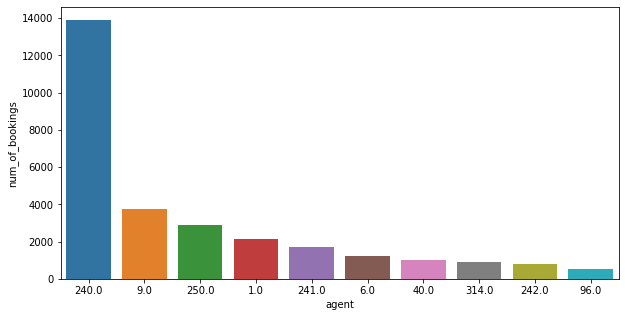

In [11]:
d1 = pd.DataFrame(df1['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
d1 = d1[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

##            Agent no. 9 has made most no. of bookings.

#    **2.Which meal type is most preffered meal of customers?**



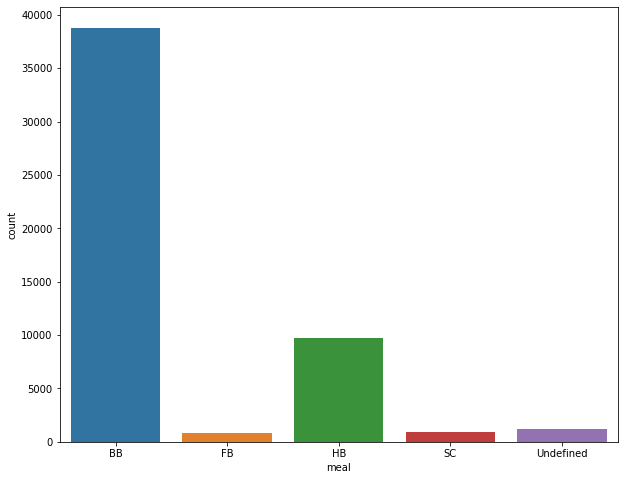

In [12]:
plt.figure( figsize=(10, 8))

sns.countplot(x =df1['meal'])
plt.show()



# BB (bed and breakfast) is the most prefered type of meal in hotel.  

# **3.Which is the most common channel for booking hotels?**

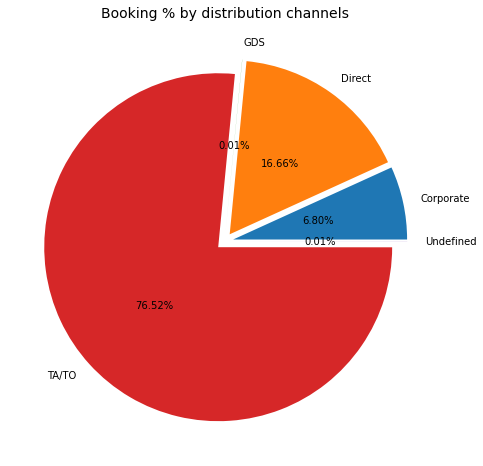

In [13]:
group_by_dc =df1.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking % by distribution channels", fontsize=14);

# **TA/TO is the most common channel for booking hotels.**

# **Business Objective :**

# 1.Our main objective is perform EDA on the given dataset and draw useful conclusions about general trends in hotel bookings and how factors governing hotel bookings interact with each other.

# 2.to understand and visualize dataset from hotel and customer point of view ie. and give suggestions to reduce these cancellations and increase revenue of hotels.

# 3.This makes analyzing the patterns available in the past data more important to help the hotels plan better.

# 4.A hotel reservation system enables guests to schedule dates and length of stay, room selection, extras, and payment all in one place.

# 5.to provide the best service and a excillent experience to customers from start to finish.

# 6.An online booking system gives you the freedom of taking bookings 24/7.

# 7.The five key business performance objectives for any organization include quality, speed, dependability, flexibility, and cost.

# 8.This data set contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has from the data.

# 9.To predict which kind of customers need special request and predicting the possibility of a booking for a hotel by knowing different features. This will help the hotel booking company to make better decisions.

# 10.To present the hotel as an excellent, or the best, choice to its target market.

# 11.To make it easy for customers to make reservations.

# 12.To make it easy for customers to get their questions answered, lowering barriers to selecting this chain's hotels.

# 13.To fill as many rooms as possible at a relatively high rate.

# 14.Ease of information gathering in support of selecting a hotel.

# 15.Accurate, reliable reservations.

# 16.Efficiency of booking, especially for repeat customers.